# Import Libraries
Import pandas for data manipulation and matplotlib.pyplot for plotting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load Data
Load the 'motor_data' and 'blood_data' datasets from their respective CSV files.

In [2]:
# Load the datasets
motor_data_path = '/Users/larsheijnen/Thesis/data/MDS-UPDRS_Patient_Data_only_date_formatted.csv'
blood_data_path = '/Users/larsheijnen/Thesis/data/blood/BLOOD_DATE_FORMATTED_CSF_FILTERED.csv'

motor_data = pd.read_csv(motor_data_path)
blood_data = pd.read_csv(blood_data_path, low_memory=False)

print("Motor data loaded:")
display(motor_data.head(3))
print("\nBlood data loaded:")
display(blood_data.head(3))

Motor data loaded:


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PDTRTMNT,PDSTATE,HRPOSTMED,HRDBSON,HRDBSOFF,...,ONNORSN,HIFUYN,DBSONTM,PDMEDDT,PDMEDTM,EXAMDT,EXAMTM,NP3TOT,ORIG_ENTRY,LAST_UPDATE
0,272451901,3000,BL,NUPDRS3,2011-02-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2011-02-01,13:17:00,4.0,2011-02-01,2020-06-25 16:02:19.0
1,338703101,3000,V04,NUPDRS3,2012-03-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2012-03-01,13:47:00,1.0,2012-03-01,2020-06-25 16:02:22.0
2,385009801,3000,V06,NUPDRS3,2013-02-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2013-02-01,12:22:00,4.0,2013-02-01,2020-06-25 16:02:22.0



Blood data loaded:


,PATNO,SEX,COHORT,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,3000,Female,Control,V04,Cerebrospinal Fluid,ABeta 1-42,1060,pg/mL,2017-06-27,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
1,3000,Female,Control,BL,Cerebrospinal Fluid,CSF Alpha-synuclein,1798.9,pg/ml,2016-10-11,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
2,3000,Female,Control,V08,Cerebrospinal Fluid,pTau,21.15,pg/mL,2017-06-27,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0


# Convert Date Columns
Ensure the 'INFODT' column in motor_data and the 'RUNDATE' column in blood_data are converted to datetime objects using pd.to_datetime. Handle potential errors during conversion.

In [3]:
# Convert date columns to datetime objects
motor_data['INFODT'] = pd.to_datetime(motor_data['INFODT'], errors='coerce')
blood_data['RUNDATE'] = pd.to_datetime(blood_data['RUNDATE'], errors='coerce')

# Check for any null values created during conversion
print("Null dates after conversion:")
print(f"Motor data INFODT nulls: {motor_data['INFODT'].isnull().sum()}")
print(f"Blood data RUNDATE nulls: {blood_data['RUNDATE'].isnull().sum()}")

# Drop rows with invalid dates if necessary
motor_data.dropna(subset=['INFODT'], inplace=True)
blood_data.dropna(subset=['RUNDATE'], inplace=True)

print("\nData types after conversion:")
print(f"Motor data INFODT dtype: {motor_data['INFODT'].dtype}")
print(f"Blood data RUNDATE dtype: {blood_data['RUNDATE'].dtype}")

Null dates after conversion:
Motor data INFODT nulls: 0
Blood data RUNDATE nulls: 0

Data types after conversion:
Motor data INFODT dtype: datetime64[ns]
Blood data RUNDATE dtype: datetime64[ns]


# Calculate Temporal Ranges
Calculate the minimum and maximum dates for both the 'INFODT' and 'RUNDATE' columns.

In [4]:
# Calculate the temporal range for motor_data
motor_start_date = motor_data['INFODT'].min()
motor_end_date = motor_data['INFODT'].max()

# Calculate the temporal range for blood_data
blood_start_date = blood_data['RUNDATE'].min()
blood_end_date = blood_data['RUNDATE'].max()

print(f"Motor data range: {motor_start_date} to {motor_end_date}")
print(f"Blood data range: {blood_start_date} to {blood_end_date}")

Motor data range: 2010-07-01 00:00:00 to 2025-03-01 00:00:00
Blood data range: 2016-09-14 00:00:00 to 2021-04-16 00:00:00


# Plot Temporal Ranges Side-by-Side
Use matplotlib subplots to create two plots next to each other. Each plot will visualize the calculated temporal range (start date to end date) for one of the datasets (motor_data and blood_data).

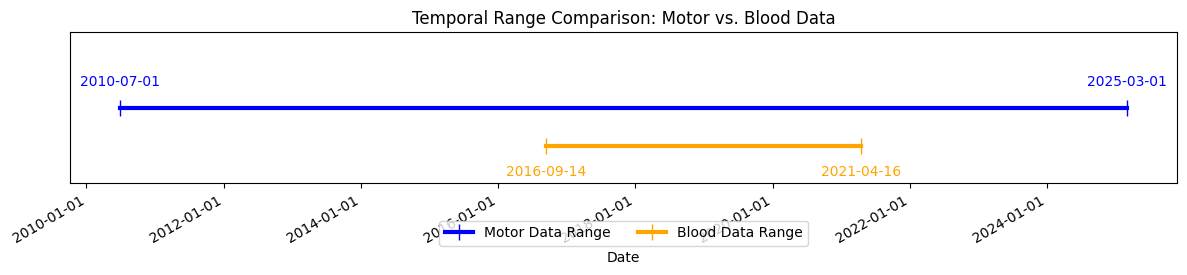

In [6]:
# In cell with id: dc37f8d3
# Create figure and a single axes object
fig, ax = plt.subplots(figsize=(12, 3)) # Adjusted figure size for a single plot

# --- Plot Both Ranges on the Same Axes ---
ax.set_title('Temporal Range Comparison: Motor vs. Blood Data')

# Plot Motor Data Range (slightly offset vertically for visibility)
ax.plot([motor_start_date, motor_end_date], [1, 1], marker='|', markersize=12, linestyle='-', linewidth=3, label='Motor Data Range', color='blue')
ax.text(motor_start_date, 1.05, motor_start_date.strftime('%Y-%m-%d'), ha='center', va='bottom', color='blue')
ax.text(motor_end_date, 1.05, motor_end_date.strftime('%Y-%m-%d'), ha='center', va='bottom', color='blue')


# Plot Blood Data Range (slightly offset vertically for visibility)
ax.plot([blood_start_date, blood_end_date], [0.9, 0.9], marker='|', markersize=12, linestyle='-', linewidth=3, color='orange', label='Blood Data Range')
ax.text(blood_start_date, 0.85, blood_start_date.strftime('%Y-%m-%d'), ha='center', va='top', color='orange')
ax.text(blood_end_date, 0.85, blood_end_date.strftime('%Y-%m-%d'), ha='center', va='top', color='orange')


# --- Customize the Plot ---
ax.set_yticks([]) # Hide Y-axis ticks
ax.set_xlabel('Date')
ax.set_ylim(0.8, 1.2) # Adjust Y limits to keep lines separate but close

# Format the x-axis to display dates nicely
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10)) # Adjust number of ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, ha='right') # Rotate labels slightly

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2) # Position legend below plot

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.05, 1, 1]) # Adjust layout to prevent label overlap and make space for legend
plt.show()